In [47]:
import pandas as pd
import pickle
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually
plt.rcParams['figure.figsize'] = (16, 9)

In [9]:
nlp = spacy.load('zh_core_web_lg')

In [2]:
movies = pd.read_csv("./data/movies_prop_df.csv", index_col=0)
movies.head()

,id,name,year,description,genre,ratingCount,bestRating,worstRating,ratingValue,directorMaxEffect,...,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022,dPropaganda
0,10344754,毒战 毒戰,2012,刚刚结束一次危险任务的津海市缉毒大队队长张雷（孙红雷 饰），在医院意外见到因车祸入院治疗的香...,"['剧情', '动作', '犯罪']",210072,10,2,7.5,34235,...,0,0,0,0,0,0,0,0,0,0
1,10355621,粉红女郎之爱人快跑,2013,为了泡到一个男朋友，结婚狂（阿雅 饰）碰见魔术师高明（锦荣 饰）后，便告诉对方自己怀了他的孩...,"['喜剧', '爱情']",1826,10,2,3.2,65,...,0,0,0,0,0,0,0,0,0,0
2,10355633,绝命藏宝图,2012,一对不食人间烟火的青年男女——彭少文和程雪珂狼狈地逃到余姚县城门口，他们身后有一群凶神恶煞的...,"['动作', '悬疑']",78,10,2,3.2,43,...,0,0,0,0,0,0,0,0,0,0
4,10430281,七个隆咚锵咚锵,2012,韩峰（韩兆 饰）在一天之内丢掉了工作和恋人，一无所有的他陷入了人生的低谷之中。然而，韩峰的运...,"['喜剧', '爱情']",506,10,2,4.9,115,...,0,0,0,0,0,0,0,0,0,0
5,10437802,武当少年 武當少年,2010,主人公翔翔原本是一个天真浪漫，活泼好动的孩子，在一次观看武当武校在台湾的表演后，萌生了赴武当...,"['剧情', '儿童']",68,10,2,6.1,2,...,0,0,0,0,0,0,0,0,0,0


In [3]:
propaganda = movies[movies.dPropaganda == 1]
propaganda.head()

,id,name,year,description,genre,ratingCount,bestRating,worstRating,ratingValue,directorMaxEffect,...,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022,dPropaganda
20,10478122,平壤之约 평양에서의 약속,2012,中国青年舞蹈家王晓楠（刘冬 饰）在“民族舞蹈大赛”表演朝鲜舞蹈《铃铛》时，被总评审——奶奶陈...,['剧情'],1148,10,2,4.1,212,...,0,0,0,0,0,0,0,0,0,1
30,10508901,匹夫,2012,抗日战争年代，一群亡命之徒集结在北方平原。他们在首领方有望（黄晓明 饰）带领下，建立了一个地...,"['剧情', '动作', '战争', '西部']",26297,10,2,5.4,208,...,0,0,0,0,0,0,0,0,0,1
35,10527199,渡江！渡江！,2012,国民党军营长黄怀恩（张笑君 饰）在解放军发起渡江战役前夕，率部撤离驻守的楚家渡口，退守江南。...,"['历史', '战争']",657,10,2,3.0,3,...,0,0,0,0,0,0,0,0,0,1
38,10537987,宗师卜六,2013,电影《宗师卜六》主要讲述民国时期一代跤王卜恩富的传奇故事。影视演员、著名打星吴樾在剧中饰演主...,"['传记', '动作', '古装']",250,10,2,4.1,20,...,0,0,0,0,0,0,0,0,0,1
47,10553094,月色狰狞,2012,地矿学家李教授带学生莫天良（邢佳栋 饰）和女儿月儿探寻矿源，获绘有金矿地势的羊皮图。盗匪赵无...,"['动作', '悬疑']",349,10,2,3.4,38,...,0,0,0,0,0,0,0,0,0,1


## Top Genres for Propaganda?

In [41]:
genres = {'传记', '儿童', '冒险', '剧情', '动作', '动画', '历史', '古装', '喜剧', '奇幻', '家庭', '恐怖', '悬疑', '惊悚', '战争', '歌舞', '武侠', '灾难',
          '爱情', '犯罪', '科幻', '西部', '运动', '音乐'}

In [49]:
genre_freq = dict.fromkeys(genres, 0)

for genre in genres:
    for g in propaganda.genre:
        if genre in g:
            genre_freq[genre] += 1

genre_freq = pd.Series(genre_freq)

<AxesSubplot:>

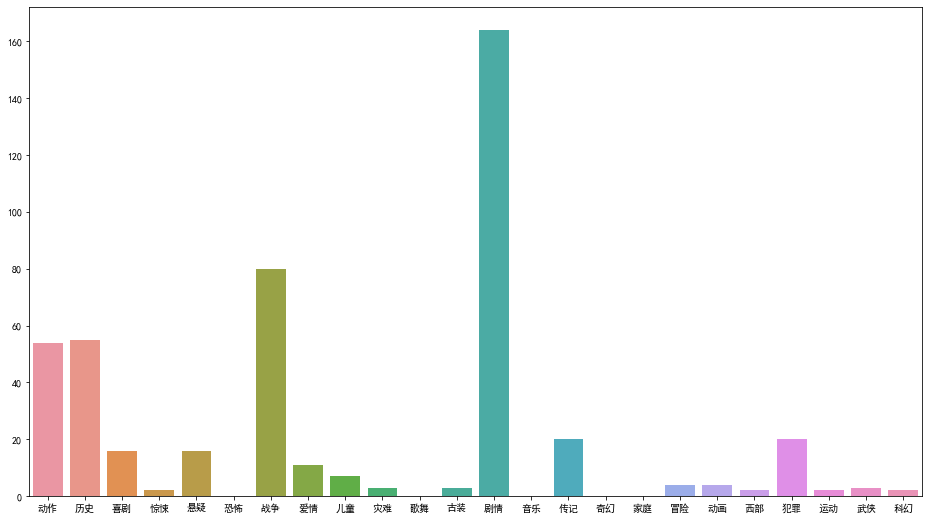

In [50]:
sns.barplot(x=genre_freq.index, y=genre_freq)

## Common Keywords?

In [33]:
lexicon = {}

for desc in propaganda.description:
    for token in nlp(desc):
        word = str(token)
        if word in lexicon:
            lexicon[word] += 1
        else:
            lexicon[word] = 1

lexicon = pd.Series(lexicon)
lexicon.head()

中国     142
青年      21
舞蹈家      1
王晓楠      3
（      272
dtype: int64

In [34]:
lexicon.sort_values(ascending=False).iloc[:500]

，     3029
的     2161
。     1195
了      660
在      540
      ... 
枚        9
土地       9
研究       9
拿        9
发动       9
Length: 500, dtype: int64

In [51]:
# pick out
keywords = {
    "中国",
    "日军",
    "日本",
    "抗日",
    "人民",
    "英雄",
    "部队",
    "民族",
    "精神",
    "革命",
    "牺牲",
    "国民党",
    "红军",
    "中共",
    "祖国",
    "犯罪",
    "解放",
    "领导",
    "地下党",
    "警察",
    "八路军",
    "主席",
    "日寇",
    "西藏",
    "共产党",
    "同志",
    "新疆",
    "毛泽东",
    "爱国",
}

In [52]:
keyword_freq = dict.fromkeys(keywords, 0)

# number of movies which mention
for desc in propaganda.description:
    for k in keywords:
        if k in desc:
            keyword_freq[k] += 1

keyword_freq = pd.Series(keyword_freq)

<AxesSubplot:>

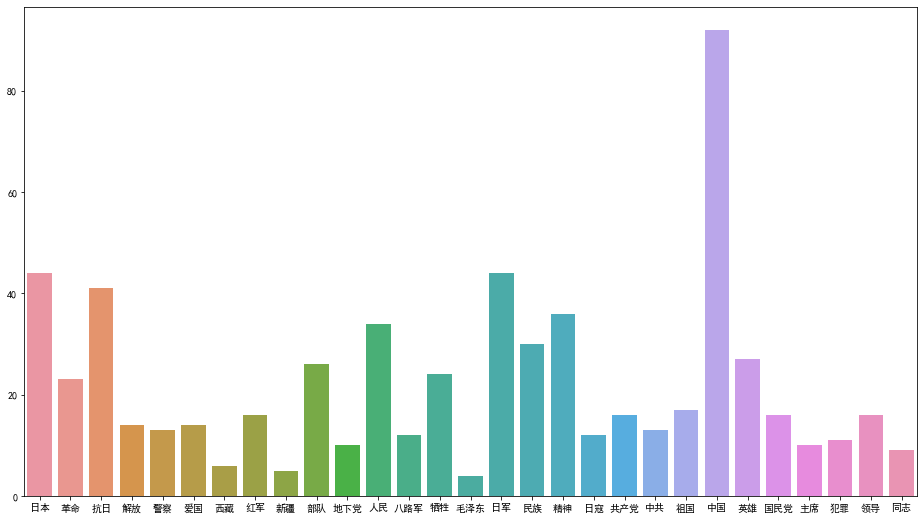

In [53]:
sns.barplot(x=keyword_freq.index, y=keyword_freq)

## Write to nice readable HTML

In [5]:
with open("./data/details_dict.pkl", mode="rb") as f:
    details_dict = pickle.load(f)

In [38]:
with open("./propaganda.html", "w", encoding="utf-8") as f:
    f.write("<style>"
        "body { font-family: sans-serif; white-space: pre-line; max-width:900px; margin: auto }"
        "</style>")
    f.write("<h1>List of Movies Identified as Propaganda</h1>")

In [39]:
with open("./propaganda.html", "a", encoding="utf-8") as f:
    for index, row in propaganda.iterrows():
        f.write(f'<img src="{details_dict[str(row.id)]["image"]}">')
        f.write(f"<p>https://movie.douban.com/subject/{row.id}/</p>")
        f.write(f"<h2>{row['name']} ({row.year})</h2>")
        f.write(f"<h3>{row.genre}</h3>")
        f.write(f"<h3>Rating: {row.ratingValue}, count: {row.ratingCount}</h3>")
        desc = row.description
        for k in keywords:
            desc = desc.replace(k, "<mark>" + k + "</mark>")
        f.write(f"<p>{desc}</p>")
        f.write("<hr>")